Importing packages needed

In [196]:
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Importing Placement Dataset 

In [198]:
data=pd.read_csv("Placement_Data_Full_Class.csv")



# Exploratory Data Analysis



The **.head()** function prints the first few rows of the dataset

In [199]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


The **.columns** function is used to print the headers of each column in the dataset,it helps us understand what columns are present in the dataset  

In [200]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

## Data Statistics
> In this section we will understand the key features of the data ranging from the size of the dataset to what types of variables are present,this helps us manage outliers and missing values

1) Shape 


> This function returns the size of the dataframe in rows and columns

In [201]:
data.shape

(215, 15)

2) Info


> This function returns the datatypes and the number of non null values of all attributes present in the dataset

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


From the dataset we can observe that we have been provided with a variety of information,mostly pertaining to academic performance scores,and stream of education,we are also provided with information of students with work experience and salaries,however since students don't earn salaries until they are placed,we may find many null values in this column

As the main motive of our model is to determine whether or not a student will be placed, the **status** column will be our target attribute or y column

The serial no column makes no contribution whatsoever to the model,hence we drop the the serial no column

In [203]:
data=data.drop("sl_no",axis=1)

Let us now count the number of null values in each column in the dataset

In [204]:
data.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

As expected we find many null values in the salary section, since our main goal is to predict whether or not a student will be placed, salary will not be required.
Hence we drop this column

In [205]:
data=data.drop("salary",axis=1)

In [206]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


3.) Column-wise analysis


**Feature :** Gender

We shall now use the **.value_counts()** function to count the number of male and female applicants in the dataset

In [207]:
data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

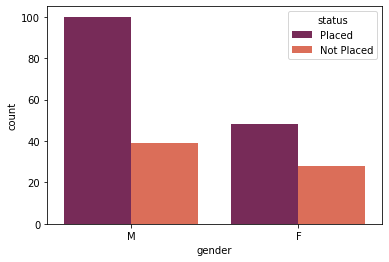

In [208]:
sns.countplot(x="gender",hue="status", data=data,palette='rocket')
plt.show()

*Insights*

>We have samples of 139 Male students and 76 Female students.30 Female and 40 Male students are not placed. Male students have found to have comparatively higher placement rates.


**Feature:** ssc_p (Secondary Education percentage), ssc_b (Board Of Education)

In [209]:
data.ssc_b.value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

C:\Users\nicole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


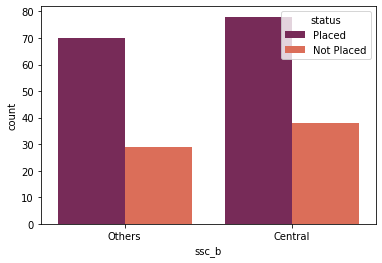

In [210]:
sns.countplot("ssc_b", hue="status", data=data,palette='rocket')
plt.show()

*Insights*

>We have samples of 116 central board students and 99 students from other boards.There isn't much difference between the placed and unplaced students of different boards,allowing us to conclude that board of education does not greatly determine chances of getting placed 

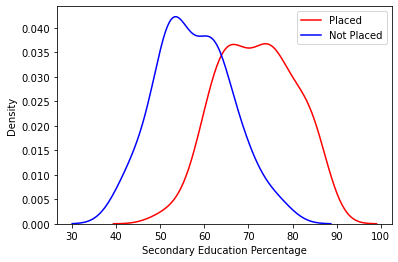

In [211]:
#Kernel-Density Plot
sns.kdeplot(data.ssc_p[ data.status=="Placed"],color='r')
sns.kdeplot(data.ssc_p[ data.status=="Not Placed"],color='b')
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

*Insights*

>From the above graph we can infer that all students that scored above 90% in their secondary education were placed,whilst none of the students with percentages less than 40 were placed

**Feature:** hsc_p (Higher Secondary Education percentage), hsc_b (Board Of Education), hsc_s (Specialization in Higher Secondary Education)

In [212]:
data.hsc_b.value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

C:\Users\nicole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


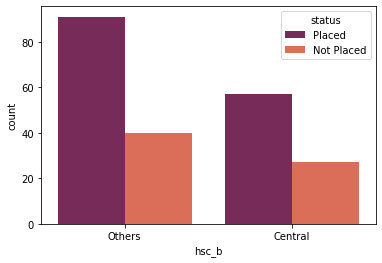

In [213]:
sns.countplot("hsc_b", hue="status", data=data,palette='rocket')
plt.show()

*Insights*

>We have samples of 131 central board students and 84 students from other boards.There isn't much difference between the ratio of placed and unplaced students of different boards,allowing us to conclude once again that board of education does not greatly determine chances of getting placed 

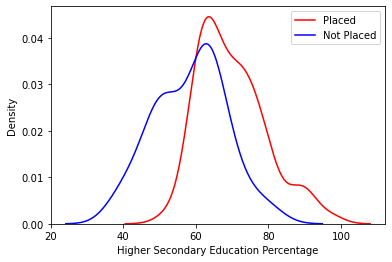

In [214]:
sns.kdeplot(data.hsc_p[ data.status=="Placed"],color='r')
sns.kdeplot(data.hsc_p[ data.status=="Not Placed"],color='b')
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

*Insights*

>In the above graph we can see an overlap,most students being placed have percentages ranging from 60% to 80%,however here too a student needs more than 40% to have a chance of being placed

In [215]:
data.hsc_s.value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

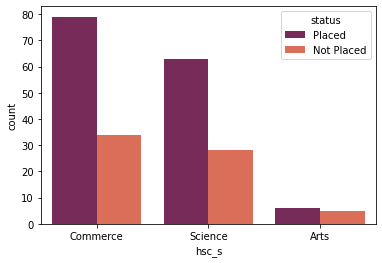

In [216]:
sns.countplot(x="hsc_s", hue="status", data=data,palette="rocket")
plt.show()

*Insights*

>There are very few arts students in the dataset and hence we can't draw a conclusion.In the commerce and science sections there is a 2:1 ratio between placed and unplaced students

**Feature:** degree_p (Degree Percentage), degree_t (Under Graduation Degree Field)

In [217]:
data.degree_t.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

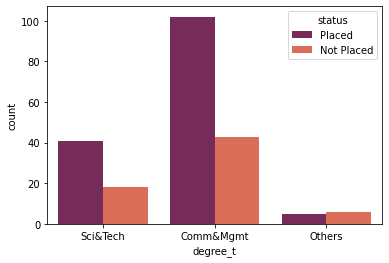

In [218]:
sns.countplot(x="degree_t", hue="status", data=data,palette='rocket')
plt.show()

*Insights*

>We have too few students from Others section,hence we can't make a decision based on few cases.In Sci& Tech and Comm&Mgmt degrees we once again see a 2:1 ratio between placed and unplaced students

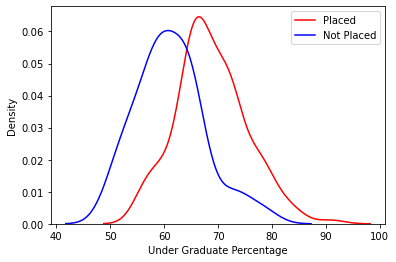

In [219]:
sns.kdeplot(data.degree_p[ data.status=="Placed"],color='r')
sns.kdeplot(data.degree_p[ data.status=="Not Placed"],color='b')
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()

*Insights*

>In the above graph we can see an overlap,most students being placed have percentages ranging from 60% to 100%,however here a student needs more than 50% to have a chance of being placed

**Feature:** workex (Work Experience)

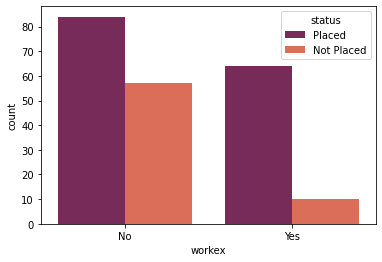

In [220]:
sns.countplot(x="workex", hue="status", data=data,palette='rocket')
plt.show()

*Insights*

>Work Experience plays a very important role in determining whether or not a student will be placed,as we can see there are very few students with work experience that haven't been placed

**Feature:** etest_p (Employability test percentage)

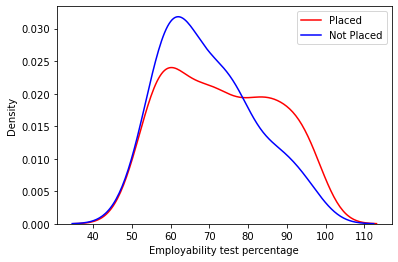

In [221]:
sns.kdeplot(data.etest_p[ data.status=="Placed"],color='r')
sns.kdeplot(data.etest_p[ data.status=="Not Placed"],color='b')
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()

*Insights*

>In the above graph we can see a very high overlap,this factor does not affect placement greatly,however we observe more unplaced students in the 50 to 70 percent range and more placed students in the 80% percent range


**Feature:** specialisation (Post Graduate Specialization)

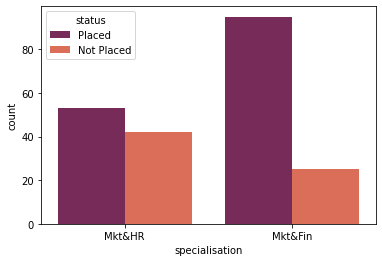

In [222]:
sns.countplot(x="specialisation", hue="status", data=data,palette='rocket')
plt.show()

*Insights*

>In the above graph we can see most students from a Marketing and Finance background being placed than those in Marketing and HR


**Feature:** mba_p (MBA percentage)

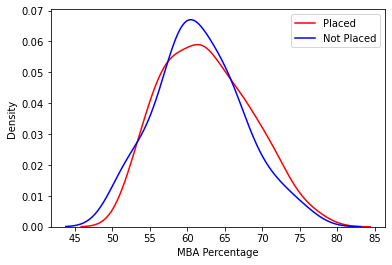

In [223]:
sns.kdeplot(data.mba_p[ data.status=="Placed"],color='r')
sns.kdeplot(data.mba_p[ data.status=="Not Placed"],color='b')
plt.legend(["Placed", "Not Placed"])
plt.xlabel("MBA Percentage")
plt.show()

*Insights*

>In the above graph we can see that MBA Percentage does not have a major effect on placements, although people scoring below 45% are not getting placed.

Correlation between percentages

<AxesSubplot:>

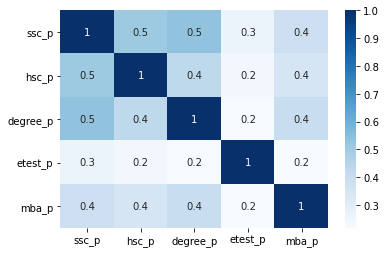

In [224]:
sns.heatmap(data.corr(),annot=True,fmt='.1g',cmap='Blues')

*Insights*

>We can see that it is symmetrical i.e. the bottom left is same as the top right.Candidates who were good in their academic careers performed well throughout school,undergrad,mba and even employability test

# Data Preprocessing

As shown in the above graphs we know that the board of education doesn't affect the final outcome,hence we drop those columns

In [225]:
data=data.drop('ssc_b',axis=1)
data=data.drop('hsc_b',axis=1)
data.head(5)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


We now check which attributes are categorical in nature,using the **.dtypes** function which will return their datatypes

In [226]:
data.dtypes

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
dtype: object

Machines understand numbers, not text. We need to convert each text category to numbers in order for the machine to process them using mathematical equations. 

A Label Encoder is used to convert labels into numeric form i.e. machine readable form,in this case the label encoder converts:


1.   gender to 0 & 1 (0:Female , 1:Male)
2.   workex to 0 & 1 (0:no , 1:yes)
3.   specialization to 0 & 1 (0:mkt&fin , 1:mkt&hr)
4.   status to 0 & 1 (0:not placed, 1:placed)

In [227]:
from sklearn.preprocessing import LabelEncoder


# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
data['gender']=label_encoder.fit_transform(data['gender'])
data['workex']=label_encoder.fit_transform(data['workex'])
data['specialisation']=label_encoder.fit_transform(data['specialisation'])
data['status']=label_encoder.fit_transform(data['status'])
data.head(10)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.00,1,58.80,1
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.50,0,66.28,1
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.00,0,57.80,1
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.00,1,59.43,0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.80,0,55.50,1
5,1,55.00,49.80,Science,67.25,Sci&Tech,1,55.00,0,51.58,0
6,0,46.00,49.20,Commerce,79.00,Comm&Mgmt,0,74.28,0,53.29,0
7,1,82.00,64.00,Science,66.00,Sci&Tech,1,67.00,0,62.14,1
8,1,73.00,79.00,Commerce,72.00,Comm&Mgmt,0,91.34,0,61.29,1
9,1,58.00,70.00,Commerce,61.00,Comm&Mgmt,0,54.00,0,52.21,0


One Hot Encoding

One hot encoding for the category which has more than two types of classes. With one-hot, we convert each categorical value with more than 2 types of classes into a new categorical column and assign a binary value of 1 or 0 to those columns. 

In [228]:
data = pd.get_dummies(data, columns=['hsc_s','degree_t'])

In [229]:
data.head(5)

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


Now we finally check the total no. of columns we have after encoding using the **.columns** function 

In [230]:
len(data.columns)

15

We shall now check if output class is uniformly distributed

C:\Users\nicole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

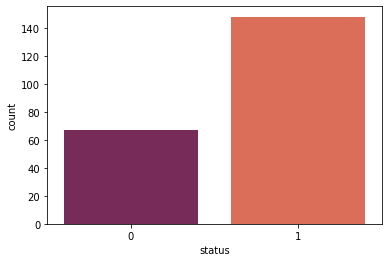

In [231]:
sns.countplot(data['status'],palette="rocket")

We can clearly see that the dataset is highly imbalanced.

Inoder to fix this we make use of a python library known as imbalanced-learn to deal with imbalanced data.From imbalanced learn we will be using the RandomOverSampler.


> The bias in a training dataset can influence machine learning algorithms, leading some to ignore the minority class entirely.One approach to addressing the problem of class imbalance is to randomly resample the training dataset. The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling. We shall be performing oversampling

Dividing dataset into X and Y(outcome)

In [232]:
x = data.drop(['status'],axis=1)
y = data['status']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [233]:
x_sampled.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,0,1,0,1,0,0


In [234]:
y_sampled.head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int32

Checking whether the output class is balanced after oversampling

<AxesSubplot:xlabel='status', ylabel='count'>

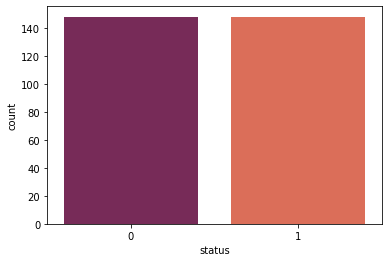

In [235]:
sns.countplot(x=y_sampled,palette="rocket")

Train Test Split

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sampled, y_sampled,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (236, 14)
Input Test: (60, 14)
Output Training: (236,)
Output Test: (60,)


# Machine Learning Models 

1.) Logistic Regression

> Since the output class has only 2 possible outcomes we use binary logistic regression

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg =  LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


A confusion matrix is a way to express how many of a classifier’s predictions were correct, and when incorrect. 
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of the trained classification model.

>Precision is defined as the ratio of true positives to the sum of true and false positives.
>Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
>The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.
>Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [238]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[29  5]
 [ 1 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91        34
           1       0.83      0.96      0.89        26

    accuracy                           0.90        60
   macro avg       0.90      0.91      0.90        60
weighted avg       0.91      0.90      0.90        60



An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve
> More the AUC, better the precision of the model

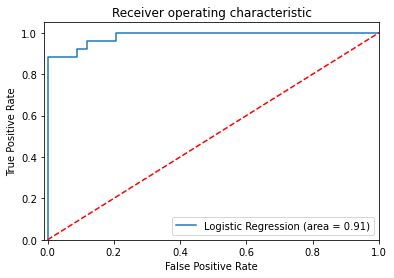

In [239]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

2.) Decision Tree

In [240]:
!pip install scikit-learn


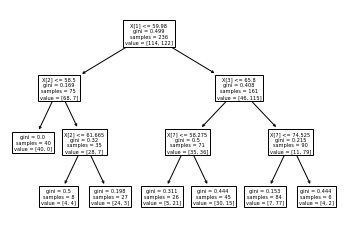

In [241]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
dtree = tree.DecisionTreeClassifier(random_state=0,max_depth=3)
dtree=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
tree.plot_tree(dtree)
plt.show()

In [242]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7833333333333333


Confusion Matrix and Classification report of descision tree model

In [243]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[31  3]
 [10 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        34
           1       0.84      0.62      0.71        26

    accuracy                           0.78        60
   macro avg       0.80      0.76      0.77        60
weighted avg       0.79      0.78      0.78        60



ROC Curve and AUC for Decision Tree

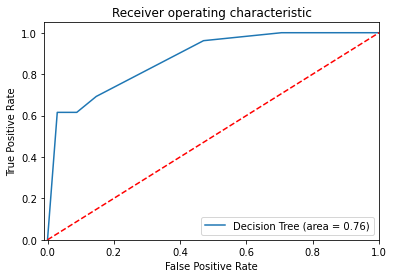

In [244]:
dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

3.) Random Forest

In [245]:
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier(n_estimators=100)
rt.fit(X_train,y_train)
y_pred=rt.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


Confusion matrix and classification report for Random Forest

In [246]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[34  0]
 [ 1 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.96      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



ROC Curve and AUC for Random Forest classifier

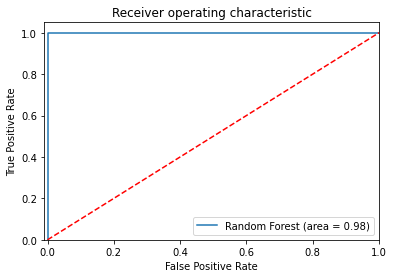

In [247]:
rt_roc_auc = roc_auc_score(y_test, rt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Looking at Feature Importance

Text(0.5, 1.0, 'Visualizing Important Features')

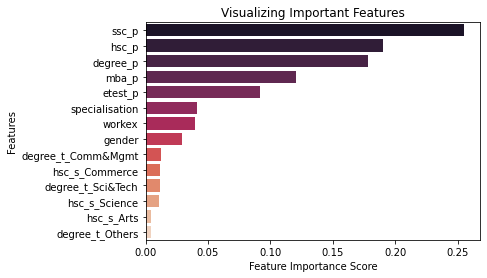

In [248]:
feature_cols = X_train.columns
feature_imp = pd.Series(rt.feature_importances_,index=feature_cols).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index,palette="rocket")
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

We observe that few of the features have very less importance while predicting the output class, hence we drop those columns

In [249]:

X=data.drop(['status','degree_t_Comm&Mgmt','degree_t_Sci&Tech','hsc_s_Science','hsc_s_Commerce',
                        'hsc_s_Arts','degree_t_Others'],axis=1)
y=data.status
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
rt2=RandomForestClassifier(n_estimators=100)
rt2.fit(X_train,y_train)
y_pred=rt2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
roc_value = roc_auc_score(y_test, y_pred)
roc_value
print("ROC Value:",roc_value)

Accuracy: 0.813953488372093
ROC Value: 0.7642857142857142


In [250]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 9  6]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.81      0.93      0.87        28

    accuracy                           0.81        43
   macro avg       0.82      0.76      0.78        43
weighted avg       0.81      0.81      0.81        43



4) KNN classifier

Initially we perform hyperparameter tuning on the dataset to analyse which value of K will give minimum error rate
>Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained. 

In [251]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

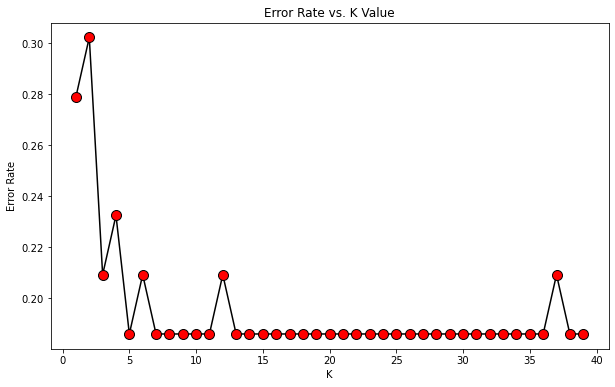

In [252]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We observe that the least value of K for which error rate is minimum is 5. Hence we use K=5 while implementing the algorithm.
>Accuracy of the model along with Confusion matrix and classification report

In [253]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.813953488372093
Confusion Matrix:
 [[ 7  8]
 [ 0 28]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.78      1.00      0.88        28

    accuracy                           0.81        43
   macro avg       0.89      0.73      0.76        43
weighted avg       0.86      0.81      0.79        43



ROC Curve and AUC for KNN

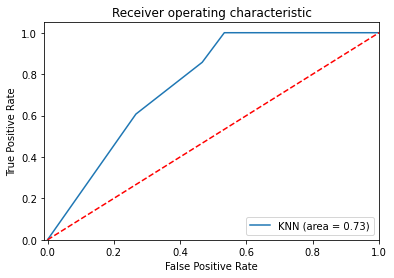

In [254]:
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

5) Naive Bayes

In [255]:
#Importing and fitting
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#Applying and predicting
y_pred = gnb.predict(X_test)
cv_scores = cross_val_score(gnb, X, y,
                            cv=10,
                            scoring='precision')
print("Cross-validation precision: %f" % cv_scores.mean())

Cross-validation precision: 0.867254


In [256]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8372093023255814


Confusion matrix and classification report for GNB

In [257]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[11  4]
 [ 3 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.89      0.88        28

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.82        43
weighted avg       0.84      0.84      0.84        43



ROC Curve and AUC for GNB

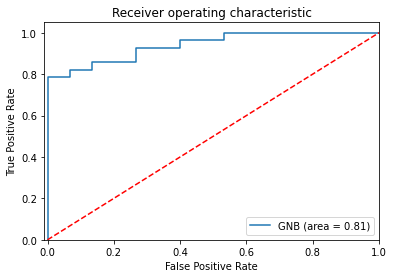

In [258]:
gnb_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()